In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
pd.options.display.max_rows = 10

In [8]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
x = df.drop(labels='class', axis=1).values
y = df['class'].values

print(x.shape, y.shape)

(150, 4) (150,)


In [11]:
class MyPCACov():
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eigen_values = None
        self.eigen_vectors = None
    
    def fit(self, x):
        self.n_components = x.shape[1] if self.n_components is None else self.n_components
        self.mean_ = np.mean(x, axis=0)
        
        cov_matrix = np.cov(x - self.mean_, rowvar=False)
        
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        
        self.sorted_components_ = np.argsort(self.eigen_values)[::-1]
        
        self.projection_matrix_ = self.eigen_vectors[self.sorted_components_[:self.n_components]]

        self.explained_variance_ = self.eigen_values[self.sorted_components_]
        self.explained_variance_ratio_ = self.explained_variance_ / self.eigen_values.sum()
        
    def transform(self, x):
        return np.dot(x - self.mean_, self.projection_matrix_.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix_) + self.mean_

In [12]:
class MyPCASVD():
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eigen_values = None
        self.eigen_vectors = None
    
    def fit(self, x):
        self.n_components = x.shape[1] if self.n_components is None else self.n_components
        self.mean_ = np.mean(x, axis=0)
        
        U, s, Vt = np.linalg.svd(x - self.mean_, full_matrices=False) # a matriz s já retorna ordenada
#         S = np.diag(s)
        
        self.eigen_vectors = Vt
        self.eigen_values = s
        
        self.projection_matrix = self.eigen_vectors[:self.n_components]

        self.explained_variance_ = (self.eigen_values ** 2) / (x.shape[0] - 1)
        self.explained_variance_ratio_ = self.explained_variance_ / self.explained_variance_.sum()
        
    def transform(self, x):
        return np.dot(x - self.mean_, self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean_

In [13]:
std = StandardScaler()
x_std = StandardScaler().fit_transform(x)

In [14]:
pca_cov = MyPCACov(n_components=2)
pca_cov.fit(x_std)

print('Autovetores: \n', pca_cov.eigen_vectors)
print('Autovalores: \n', pca_cov.eigen_values)
print('Variância explicada: \n', pca_cov.explained_variance_)
print('Variância explicada (ratio): \n', pca_cov.explained_variance_ratio_)
print('Componentes ordenados: \n', pca_cov.sorted_components_)

Autovetores: 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]
Autovalores: 
 [2.93808505 0.9201649  0.14774182 0.02085386]
Variância explicada: 
 [2.93808505 0.9201649  0.14774182 0.02085386]
Variância explicada (ratio): 
 [0.72962445 0.22850762 0.03668922 0.00517871]
Componentes ordenados: 
 [0 1 2 3]


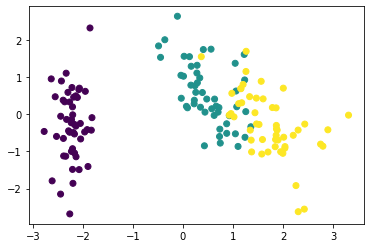

In [15]:
x_std_proj = pca_cov.transform(x_std)

plt.figure()
plt.scatter(x_std_proj[:, 0], x_std_proj[:, 1], c=y)

In [16]:
x_std_back = pca_cov.inverse_transform(x_std_proj)

print(x_std[:5])
print(x_std_back[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
[[-0.99888895  1.05319838 -1.30270654 -1.24709825]
 [-1.33874781 -0.06192302 -1.22432772 -1.22057235]
 [-1.36096129  0.32111685 -1.38060338 -1.35833824]
 [-1.42359795  0.0677615  -1.34922386 -1.33881298]
 [-1.00113823  1.24091818 -1.37125365 -1.30661752]]


In [17]:
pca_svd = MyPCASVD(n_components=2)
pca_svd.fit(x_std)

print('Autovetores: \n', pca_svd.eigen_vectors)
print('Autovalores: \n', pca_svd.eigen_values)
print('Variância explicada: \n', pca_svd.explained_variance_)
print('Variância explicada (ratio): \n', pca_svd.explained_variance_ratio_)

Autovetores: 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]
Autovalores: 
 [20.92306556 11.7091661   4.69185798  1.76273239]
Variância explicada: 
 [2.93808505 0.9201649  0.14774182 0.02085386]
Variância explicada (ratio): 
 [0.72962445 0.22850762 0.03668922 0.00517871]


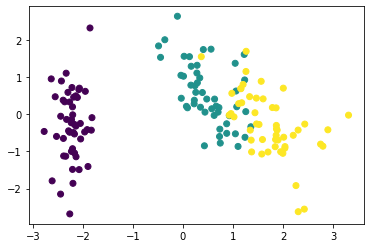

In [18]:
x_std_proj = pca_svd.transform(x_std)

plt.figure()
plt.scatter(x_std_proj[:, 0], x_std_proj[:, 1], c=y)

In [19]:
x_std_back = pca_svd.inverse_transform(x_std_proj)

print(x_std[:5])
print(x_std_back[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
[[-0.99888895  1.05319838 -1.30270654 -1.24709825]
 [-1.33874781 -0.06192302 -1.22432772 -1.22057235]
 [-1.36096129  0.32111685 -1.38060338 -1.35833824]
 [-1.42359795  0.0677615  -1.34922386 -1.33881298]
 [-1.00113823  1.24091818 -1.37125365 -1.30661752]]


In [20]:
pca_sk = PCA(n_components=2)
pca_sk.fit(x_std)

print('Autovetores: \n', pca_sk.components_)
print('Autovalores: \n', pca_sk.singular_values_)
print('Variância explicada: \n', pca_sk.explained_variance_)
print('Variância explicada (ratio): \n', pca_sk.explained_variance_ratio_)

Autovetores: 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Autovalores: 
 [20.92306556 11.7091661 ]
Variância explicada: 
 [2.93808505 0.9201649 ]
Variância explicada (ratio): 
 [0.72962445 0.22850762]


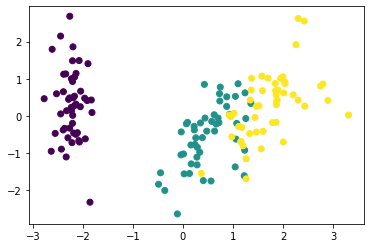

In [21]:
x_std_proj_sk = pca_sk.transform(x_std)

plt.figure()
plt.scatter(x_std_proj_sk[:, 0], x_std_proj_sk[:, 1], c=y)

In [22]:
x_std_back_sk = pca_sk.inverse_transform(x_std_proj_sk)

print(x_std[:5])
print(x_std_back_sk[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
[[-0.99888895  1.05319838 -1.30270654 -1.24709825]
 [-1.33874781 -0.06192302 -1.22432772 -1.22057235]
 [-1.36096129  0.32111685 -1.38060338 -1.35833824]
 [-1.42359795  0.0677615  -1.34922386 -1.33881298]
 [-1.00113823  1.24091818 -1.37125365 -1.30661752]]
